In [1]:
!make py

clang++ -O3 -undefined dynamic_lookup -shared -std=c++17 -fPIC `python -m pybind11 --includes` basic_tools.cpp classes.cpp ecosystem_bindings.cpp -o eco.so
classes.cpp:790:50: warning: implicit conversion from 'double' to 'int' changes
      value from 4.5 to 4 [-Wliteral-conversion]
    ->get_free_location_close_to(this->location, 4.5, 2);
      ~~~~~~~~~~~~~~~~~~~~~~~~~~                 ^~~
classes.cpp:927:48: warning: implicit conversion from 'double' to 'int' changes
      value from 6.5 to 6 [-Wliteral-conversion]
  ->get_free_location_close_to(this->location, 6.5, 4);
    ~~~~~~~~~~~~~~~~~~~~~~~~~~                 ^~~
2 warnings generated.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import time
import sys
sys.path.insert(0, '/Users/JuanLuis/git/Ecosystems/pruebas_cpp/')
import eco
import copy

In [2]:
start = time.time()
e = eco.Ecosystem()
e.initialize()
e.create_new_organisms(eco.OrganismType.PLANT_A, 2000);
e.create_new_organisms(eco.OrganismType.PLANT_B, 2000);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 200);
#e.create_new_organisms(eco.OrganismType.CARNIVORE, 200);
print("init time: {:.2f}ms".format(1000 * (time.time() - start)))

init time: 72.12ms


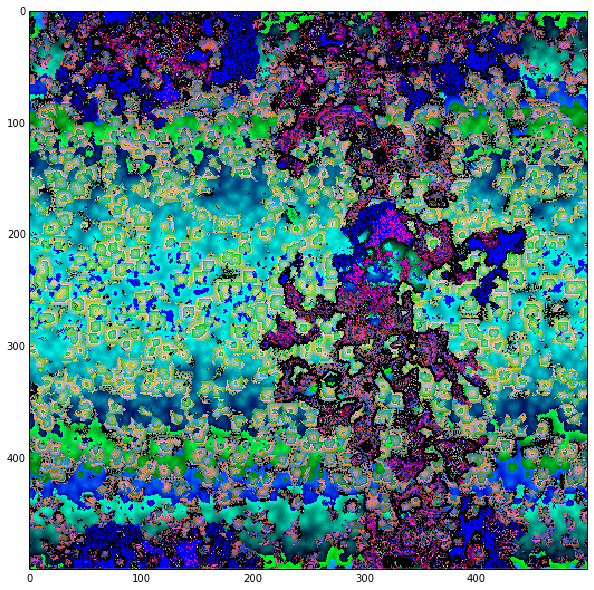

  0%|          | 330/1000000 [01:25<53:29:43,  5.19it/s]

In [ ]:
num_iters = 1000000
num_organisms = []
periodic_plot = 5
import tqdm
e.create_new_organisms(eco.OrganismType.PLANT_A, 100);
e.create_new_organisms(eco.OrganismType.PLANT_B, 100);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 10);
e.create_new_organisms(eco.OrganismType.CARNIVORE, 10);

for i in tqdm.tqdm(range(num_iters)):
    start = time.time()
    try:
        e.evolve()
    except KeyboardInterrupt:
        break
    num_organisms.append(e.get_num_organisms())
    #e.create_new_organisms(eco.OrganismType.HERBIVORE, 10);
    if i % periodic_plot == 0:
        e.create_new_organisms(eco.OrganismType.HERBIVORE, 1);
        e.create_new_organisms(eco.OrganismType.CARNIVORE, 1);
        e.create_new_organisms(eco.OrganismType.PLANT_B, 1);
        e.create_new_organisms(eco.OrganismType.PLANT_A, 1);
        #e.keep_number_of_organisms_above(eco.OrganismType.PLANT_A, 10)
        #e.keep_number_of_organisms_above(eco.OrganismType.PLANT_B, 10)
        #e.keep_number_of_organisms_above(eco.OrganismType.HERBIVORE, 10)
        #e.keep_number_of_organisms_above(eco.OrganismType.CARNIVORE, 10)
        m_aa = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_A),
                     copy=False) * 10.0
        m_ab = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_B),
                     copy=False)
        m_a = m_aa + m_ab
        m_b = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.HERBIVORE),
                     copy=False)
        m_c = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
        m_c += m_ab
        m_b += m_c + m_aa * 0.01
        #m_b += m_ab
        image = np.zeros((m_a.shape[0], m_a.shape[1], 3))
        image[:, :, 0] = m_c.T / 1500.0  # r
        image[:, :, 1] = m_a.T / 35000.0  # g
        image[:, :, 2] = m_b.T / 600.0  # b
        plt.figure(figsize=(10, 10))
        plt.imshow(image[:, :, :], interpolation='None', vmin=0.0, vmax=1.0)
        #if i % (10 * periodic_plot) == 0:
        #    plt.figure()
        #    plt.plot(num_organisms, 'b')
        #    plt.grid()
        #    plt.xlabel('Cycle')
        #    plt.ylabel('Num organisms')
        #    plt.show()       
        clear_output(wait=True)
        plt.show()


In [21]:
!pip install tqdm

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python -m pip install --upgrade pip' command.
